In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
data.shape

(200, 5)

In [17]:
# checking for NULL data in the dataset
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
x = data.loc[:, ['Annual Income (k$)',
                 'Spending Score (1-100)']].values

In [19]:
x.shape

(200, 2)

Before we apply the DBSCAN model, first, we need to obtain its two parameters.
1.MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster
2.Epsilon (Eps)


In [20]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

Sorting and plot the distances between the data points

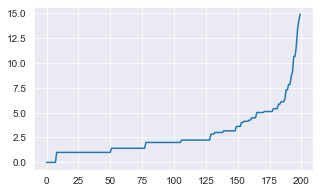

In [21]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked our Eps as 8.

We now have our two parameters as:
MinPoints = 4
Eps = 8

In [22]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

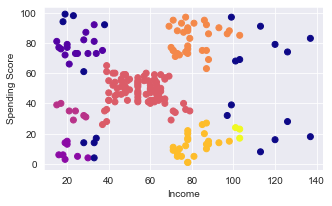

In [23]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot